In [106]:
import numpy as np
import pandas as pd
import statistics as stats
import math
import random
import statsmodels.api as sma
from scipy.stats import boxcox
from scipy.stats import norm


## Plotting libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


## Sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


pd.options.display.max_rows = 100


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')

In [8]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
# convert TotalCharges to numeric
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [15]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
# check for NaN values for whole df
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# check for NaN values in one column
churnData["TotalCharges"].isna().sum()

11

In [25]:
# remove NaN
churnData.dropna(subset=["TotalCharges"], inplace=True)

In [27]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

In [35]:
y.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [44]:
y = y.map(lambda x: 1 if x == 'Yes' else 0)

In [46]:
# split in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# KNN

In [47]:
# Scale the features either by using normalizer or a standard scaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # the standard scaler will only work with numericals
X_test = scaler.transform(X_test)

In [48]:
# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
# let's first do it on one first
# then I will write a function that that this for 15 different K's
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

KNeighborsClassifier(n_neighbors=1)

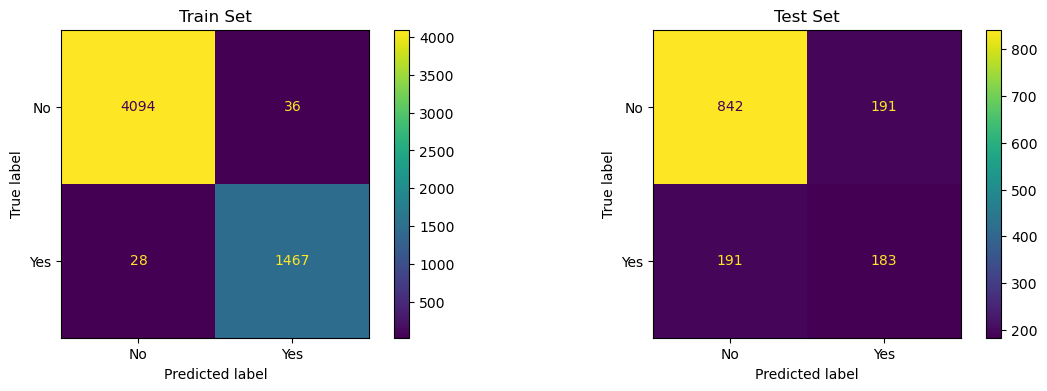

In [40]:
fig, ax = plt.subplots(1,2, figsize=(14,4))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# what is it that we get???


In [49]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [50]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.73
1,Precision,0.98,0.49
2,Recall,0.98,0.49


In [51]:
# now, write a function that does the above 15 times
# a for loop, right?


# i need this 
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)



# and I need this in the for loop, right?
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

# so, how do I combine these two?
    # I could run a counter and increase it by one each time
    

# but I also need to make sure that I store each df and give it a title with the number of k
    # it can be a list of df, which is a dict?
        # so, how do I convert a df into a df?
        


**FIRST PART OF THE LOOP**

model = KNeighborsClassifier(n_neighbors=1,weights='uniform')

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

y_pred_train=model.predict(X_train)


**SECOND PART OF THE LOOP**

error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)

error_metrics_df



*so, how do I combine these two? I could run a counter and increase it by one each time*
    

*but I also need to make sure that I store each df and give it a title with the number of k. it can be a list of df, which is a dict? so, how do I convert a df into a df?*
        
*a list of dictionaries or can I maybe store dfs in a list?*

*this is list that would suffice my needs*

*I need to pass it the dfs and the number of k before each df*

*error_metrics_df_1 = error_metrics_df
error_metrics_df_2 = error_metrics_df
a_list_of_df = [1, error_metrics_df_1, 2, error_metrics_df_2]*

*so, for each k in range 15, a model with k neighbors shall be fitted, and the function 'evaluate_classification_model' shall be run, and each time the 'error_metrics_df' shall be stored in a list that 'prints' the counter before each df*

In [66]:
def compare_k():
    list_df = []
    for k in range(15):
        model = KNeighborsClassifier(n_neighbors = k+1,weights='uniform')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) 
        y_pred_train=model.predict(X_train)
        error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
        list_df.append((k+1, error_metrics_df))
    return list_df

In [67]:
compare_k()

[(1,
    Error_metric  Train  Test
  0     Accuracy   0.99  0.73
  1    Precision   0.98  0.49
  2       Recall   0.98  0.49),
 (2,
    Error_metric  Train  Test
  0     Accuracy   0.86  0.77
  1    Precision   1.00  0.62
  2       Recall   0.49  0.30),
 (3,
    Error_metric  Train  Test
  0     Accuracy   0.86  0.75
  1    Precision   0.77  0.54
  2       Recall   0.67  0.46),
 (4,
    Error_metric  Train  Test
  0     Accuracy   0.84  0.77
  1    Precision   0.83  0.63
  2       Recall   0.50  0.36),
 (5,
    Error_metric  Train  Test
  0     Accuracy   0.84  0.76
  1    Precision   0.73  0.57
  2       Recall   0.61  0.45),
 (6,
    Error_metric  Train  Test
  0     Accuracy   0.83  0.77
  1    Precision   0.79  0.62
  2       Recall   0.50  0.37),
 (7,
    Error_metric  Train  Test
  0     Accuracy   0.83  0.77
  1    Precision   0.71  0.59
  2       Recall   0.59  0.47),
 (8,
    Error_metric  Train  Test
  0     Accuracy   0.82  0.78
  1    Precision   0.75  0.64
  2       Recall

# Logistic Regression

PowerTransformer()

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.63
2,Recall,0.46,0.42


Confusion matrix for the train set
[[3784  346]
 [ 809  686]]




Confusion matrix for the test set
[[939  94]
 [216 158]]


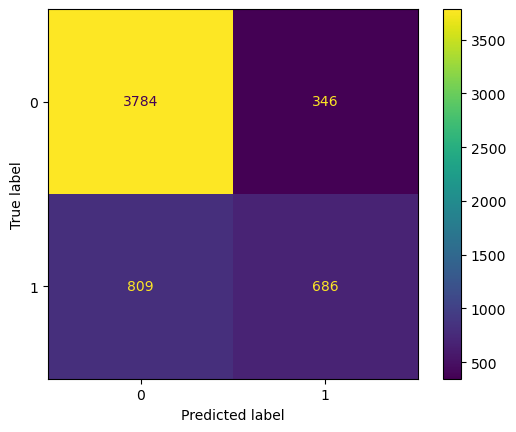

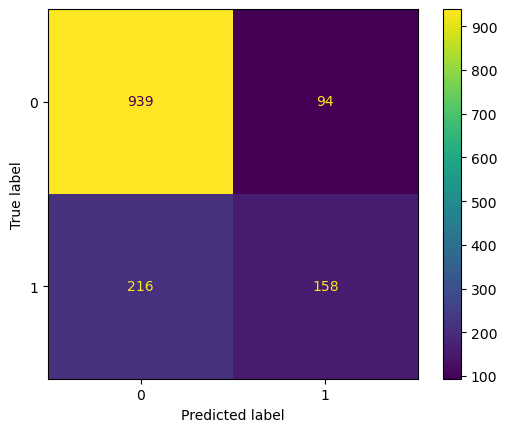

In [73]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


how to interpret this data?
    when is the accuracy good?
        -> not really
   
how does knn compare with logistic?


what number of k is best?


what can we see from the confusion matrix?

# Decision Tree

### *run the model and get the feature importance and the decision tree visually*

DecisionTreeClassifier(max_depth=3)

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.62
2,Recall,0.42,0.41


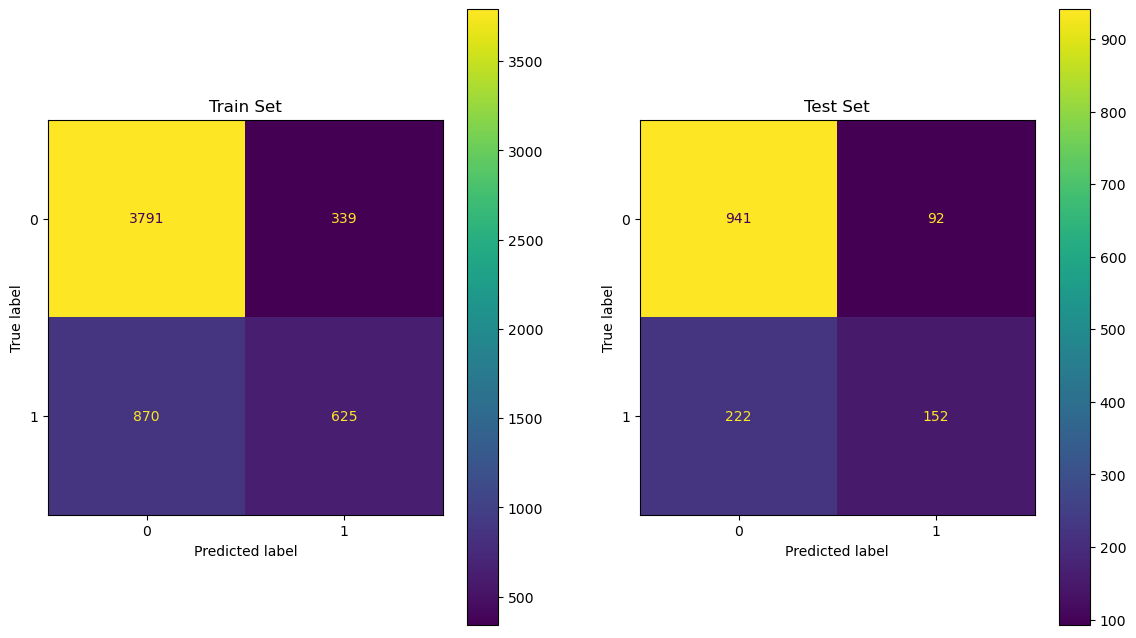

In [77]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


# Train and Test are very similar! The Decision Tree Model is in comparison with KNN and the Logistic Regression the best!
# 1. DT, 2. LogR, 3. KNN

### *build a function to find the best depth*

In [94]:
# version 2 - with one more step, storing dict_performance df
def compare_width_dt():
    list_df = []
    for k in range(8):
        model = DecisionTreeClassifier(max_depth= k+1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) 
        y_pred_train=model.predict(X_train)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
        dict_performance = performance_df.to_dict(orient='list')
        list_df.append((k+1, dict_performance))
    return list_df

In [95]:
compare_width_dt()

/Users/dmitrir./opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dmitrir./opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[(1,
  {'Error_metric': ['Accuracy', 'Precision', 'Recall'],
   'Train': [0.7342222222222222, 0.0, 0.0],
   'Test': [0.7341862117981521, 0.0, 0.0]}),
 (2,
  {'Error_metric': ['Accuracy', 'Precision', 'Recall'],
   'Train': [0.7850666666666667, 0.6483402489626556, 0.4180602006688963],
   'Test': [0.7768301350390903, 0.6229508196721312, 0.40641711229946526]}),
 (3,
  {'Error_metric': ['Accuracy', 'Precision', 'Recall'],
   'Train': [0.7850666666666667, 0.6483402489626556, 0.4180602006688963],
   'Test': [0.7768301350390903, 0.6229508196721312, 0.40641711229946526]}),
 (4,
  {'Error_metric': ['Accuracy', 'Precision', 'Recall'],
   'Train': [0.7888, 0.6825208085612366, 0.3839464882943144],
   'Test': [0.7739872068230277, 0.6296296296296297, 0.36363636363636365]}),
 (5,
  {'Error_metric': ['Accuracy', 'Precision', 'Recall'],
   'Train': [0.7982222222222223, 0.6533219761499148, 0.5130434782608696],
   'Test': [0.767590618336887, 0.5775577557755776, 0.4679144385026738]}),
 (6,
  {'Error_metri

### *compare knn, logistic regression and decision models*

<h3><span style="color:green">Train and Test are very similar in the Decision Tree model! The Decision Tree Model is in comparison with KNN and the Logistic Regression the best! So, 1. DT, 2. LogR, 3. KNN</span></h3>

In [ ]:
# so we now want to handle imbalanced data and then use cross validation techniques that 

In [99]:
# for that count the data
y.value_counts()
# imbalanced indeed

0    5163
1    1869
Name: Churn, dtype: int64

In [102]:
# upsample 1 
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [104]:
y_sm.value_counts()
# just amazing how fast it goes

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
# ok, I did that, now lets do the cross validation

In [108]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
pd.DataFrame([scores], index=["score"])

,Classification Tree,Logistic Regression,KNN
score,0.72,0.79,0.77


In [ ]:
# but that's all on the train data
    # how to see effiently the results on the test data

In [109]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i = 0
for model in model_pipeline:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    test_score = model.score(X_test, y_test)
    
    # Store the test score in the scores dictionary
    scores[model_names[i]] = test_score
    
    i = i + 1

# Create a DataFrame to display the test scores
pd.DataFrame([scores], index=["test score"])

DecisionTreeClassifier()

LogisticRegression()

KNeighborsClassifier()

,Classification Tree,Logistic Regression,KNN
test score,0.73,0.78,0.76
